# Notebook 6 - Boundary value (in)consistency
-------------


## A 6.1
-------------
As shown in <font color='blue'>Notebook 1 and 2</font> we have,
$$
	\mathcal{H} = L^2([0,L]) \otimes \bigoplus_{n=0}^{\infty} \underbrace{\mathbb{C} \otimes \dots \otimes \mathbb{C}}_{n\text{-times}},
$$
with, 
$$
	\langle x|k_{l}\rangle=\frac{1}{\sqrt{L}}\exp(\mathrm{i}k_l x), \quad k_l = \frac{2\pi l}{L}.
$$

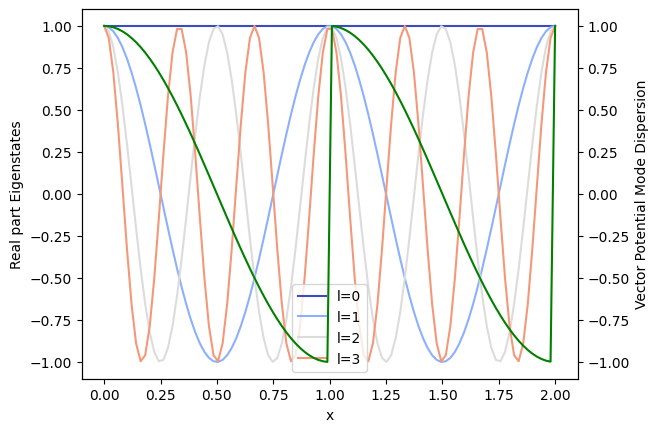

In [4]:
# plot real part (cos) of a few eigenstates
# and plot the mode profile
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi, sqrt
from matplotlib import cm

L = 1
x_space = np.linspace(0, 2*L, 100)

# Plotting
fig, ax1 = plt.subplots()

# Define colors using a colormap
num_curves = 4
colors = [cm.coolwarm(l / num_curves) for l in range(num_curves)]

# Plotting curves with the left axis and specifying colors
# note that (x%L) so "x modulo L" must be used here for the second period to start at 0 again
for l in range(num_curves):
    ax1.plot(x_space, [sqrt(1/L)*cos(l*2*pi/L*(x%L)) for x in x_space], color=colors[l], label=f'l={l}')

ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('Real part Eigenstates')

# Creating a second y-axis for the blue curve
ax2 = ax1.twinx()
ax2.plot(x_space, [cos(pi/L*(x%L)) for x in x_space], color='green')
ax2.set_ylabel('Vector Potential Mode Dispersion');

## A 6.2
-------------
First, note that $\langle 0|\hat a^\dagger|1\rangle = \langle 1|\hat a|0\rangle^* = 0$ and that the states factorize. The parameter-reduced coupling term is
\begin{equation}\begin{aligned}
     \hat C(x) &= \hat p\hat A(x) + \hat A(x)\hat p = (-\mathrm{i}\partial_x)\hat A(x) + \hat A(x)(-\mathrm{i}\partial_x) \\
     &= \left( (-\mathrm{i}\partial_x) \cos\left( \tfrac{\pi}{L}x \right) + \cos\left( \tfrac{\pi}{L}x \right) (-\mathrm{i}\partial_x) \right) (\hat a+\hat a^\dagger) \\
     &= \left( \frac{\mathrm{i}\pi}{L}\sin\left( \tfrac{\pi}{L}x \right) + 2\cos\left( \tfrac{\pi}{L}x \right)(-\mathrm{i}\partial_x) \right) (\hat a+\hat a^\dagger).
\end{aligned}\end{equation}
Written like this, we immediately see that if one applies $\hat C$ on the state $|k_l\rangle$ with $k_l=0$, that has a constant wave function, then the term with the derivative yields zero.
We then have with $\langle 0|\hat a|1 \rangle=1$
\begin{equation}
    \langle k_l | \otimes \langle 0| \hat C(x) |0\rangle \otimes |1 \rangle = \frac{\mathrm{i}\pi}{L^2}\int_0^L \exp\left(-\frac{2\pi\mathrm{i}l}{L}x\right)\sin\left( \frac{\pi}{L} x \right) \mathrm{d}x = \frac{2\mathrm{i}}{L(1-4l^2)}.
\end{equation}

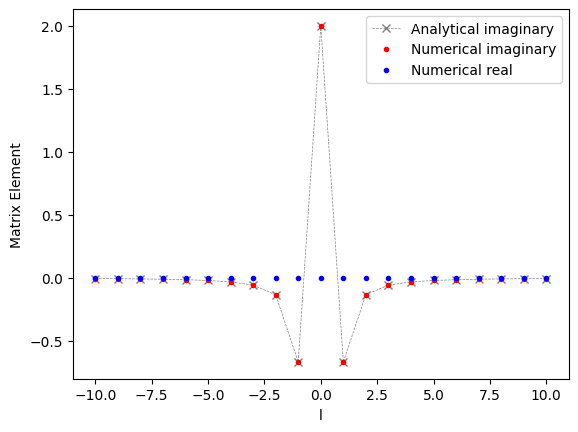

In [5]:
from scipy import integrate
l_range = range(-10,11)
# we need to separate real and imaginary parts for integrate.quad to use
sol_space_real = np.array([integrate.quad(lambda x: -(pi/L**2)*sin(-2*pi*l/L*x)*sin(pi/L*x), 0, L)[0] for l in l_range])
sol_space_imag = np.array([integrate.quad(lambda x: (pi/L**2)*cos(-2*pi*l/L*x)*sin(pi/L*x), 0, L)[0] for l in l_range])
# plot
fig, ax = plt.subplots()
ax.plot(l_range, [2/(1-4*l**2) for l in l_range], '--x', c='gray', lw=0.5, label='Analytical imaginary')
ax.plot(l_range, sol_space_imag, 'r.', label='Numerical imaginary')
ax.plot(l_range, sol_space_real, 'b.', label='Numerical real')
ax.set_xlabel('l')
ax.set_ylabel('Matrix Element')
ax.legend();

So far, this is nothing totally unexpected: a photon gets absorbed and the electron goes over into an excited state. We thus have a non-zero matrix element between states that do not have the same total momentum (given by $\hbar k_l$ for the electron). Contrast this result with the example in Q 5.4 below, where only those transitions occur that conserve momentum and energy.

Next, we test the symmetry property of this operator. At first, one would think that no problem should arise, just take $\hat C(x) = \hat p\hat A(x) + \hat A(x)\hat p$ and use that $\hat p$ is self-adjoint on the periodic domain and $\hat A(x)$ is just a multiplicative operator on the electron wave-function while $\hat a+\hat a^\dagger$ is again self-adjoint. This means that one should have

$$
\begin{aligned}
    \langle \phi,(\hat p\hat A(x) + \hat A(x)\hat p)\psi \rangle &= \langle \phi,\hat p\hat A(x) \psi \rangle + \langle \phi,\hat A(x)\hat p\psi \rangle = \langle \hat p\phi,\hat A(x) \psi \rangle + \langle \hat A(x)\phi,\hat p\psi \rangle \\
    &= \langle \hat A(x)\hat p\phi,\psi \rangle + \langle \hat p\hat A(x)\phi,\psi \rangle = \langle (\hat p\hat A(x) + \hat A(x)\hat p)\phi,\psi \rangle.
\end{aligned}
$$

But this was just a formal operation. Take the step $\langle \phi,\hat p\hat A(x) \psi \rangle = \langle \hat p\phi,\hat A(x) \psi \rangle$, then this is actually a partial integration. So take again the states $|k_l\rangle \otimes | 0 \rangle, |0\rangle \otimes | 1 \rangle$ as $\phi,\psi$ to test this step.

$$
\begin{aligned}
    \langle k_l| (-\mathrm{i}\partial_x)\cos\left( \tfrac{\pi}{L} x \right) |0\rangle &= \frac{1}{L}\int_0^L \left(\mathrm{i}\partial_x \exp\left(-\frac{2\pi\mathrm{i}l}{L}x\right)\right)\cos\left( \frac{\pi}{L} x \right) \mathrm{d}x - \frac{\mathrm{i}}{L}\underbrace{\left.\exp\left(-\frac{2\pi\mathrm{i}l}{L}x\right)\cos\left( \frac{\pi}{L} x \right)\right|_0^L}_{-2} \\
    &= \langle k_l| (\overset{\longleftarrow}{-\mathrm{i}\partial_x})\cos\left( \tfrac{\pi}{L} x \right) |0 \rangle + \frac{2\mathrm{i}}{L}.
\end{aligned}
$$
We see that an unexpected boundary term arises here that stems from the mode profile $\cos\left( \tfrac{\pi}{L} x \right)$ that does not obey the required boundary conditions. There is also no further term that could cancel this term, since $\hat p\psi = 0$ in this example as argued before. The coupling term defined from this choice of inconsistent boundary conditions is thus not symmetric when we assume that the states $|k_l\rangle \otimes | 0 \rangle, |0\rangle \otimes | 1 \rangle$ are from its domain. But are they? Note that the mode profile $\cos\left( \tfrac{\pi}{L} x \right)$ from $\hat A(x)$ has a jump on the periodic domain at $x=0$. So we can act with $\hat p=-\mathrm{i}\partial_x$ *only* if the state that the operator gets applied to is in $D(\hat p)$ and *zero* at $x=0$ (which our states are not). But at this stage we cannot revise the domain of the Hamiltonian which reflects the physics of the system after all. So we must conclude that an operator with the given coupling term $\hat C(x)$ on the periodic domain is ill-defined.

Finally, note that the chosen mode profile is in a way pathologogical already, since it does not fulfil the Coulomb-gauge condition $\partial_x \hat A(x)=0$, which only a constant function does in one dimension.

## A 6.4
-------------
$$
\langle k_l| (-\mathrm{i}\partial_x)\exp\left( \tfrac{2\pi\mathrm{i}}{L} x \right) |0\rangle = \frac{2\pi}{L^2} \int_0^L \exp\left(-\frac{2\pi\mathrm{i} l}{L} x\right) \exp\left(\frac{2\pi\mathrm{i}}{L} x\right) \mathrm{d} x =\left\{ \begin{array}{ll}
			2\pi/L & \text{if}\; l=1 \\
		      0 & \text{else.} 
		\end{array}\right.
$$
Consequently, there is a non-zero transition propbability only when the momentum of the absorbed photon exactly matches the momentum difference of the electron states. In other words, a transition between the state $|0\rangle$ and $|k_{l=1}\rangle$ is possible by absorption of one photon. This exact correspondence was reached through **boundary value consistency** in the photon and matter realms.

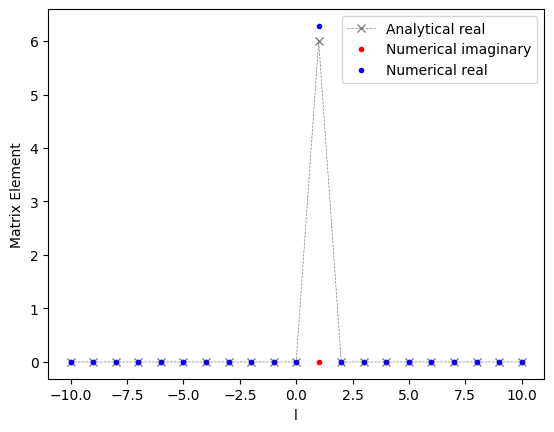

In [6]:
from cmath import exp
L = 1 # larger L leads to inaccuracy due to larger grid spacing
integrand = lambda l: lambda x: (2*pi/L**2)*exp(-2*pi*1j*l/L*x)*exp(2*pi*1j/L*x)
integrand_real = lambda l: lambda x: integrand(l)(x).real
integrand_imag = lambda l: lambda x: integrand(l)(x).imag
# try different n
n_range = range(-10,11)
# we need to separate real and imaginary parts for integrate.quad to use
sol_space_real = np.array([integrate.quad(integrand_real(l), 0, L)[0] for l in l_range])
sol_space_imag = np.array([integrate.quad(integrand_imag(l), 0, L)[0] for l in l_range])
# plot
fig, ax = plt.subplots()
l_range = np.array(l_range)
an_res = np.zeros_like(l_range)
an_res[np.argmin(abs(l_range-1))] = 2*pi/L
ax.plot(l_range, an_res, '--x', c='gray', lw=0.5, label='Analytical real')
ax.plot(l_range, sol_space_imag, 'r.', label='Numerical imaginary')
ax.plot(l_range, sol_space_real, 'b.', label='Numerical real')
ax.set_xlabel('l')
ax.set_ylabel('Matrix Element')
ax.legend();